In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import string
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 2000)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


## Load Data

In [ ]:
train_data = pd.read_csv('/content/agnews_train.csv')
test_data = pd.read_csv('/content/agnews_test.csv')

In [ ]:
train_data.head()

,text,label,label_int,science_int,sports_int,world_int,business_int
0,"John Souza, a volunteer with the Boone County chapter of the American Red Cross, is the second Columbia resident to join efforts to assist people who were affected by Tropical Storm Bonnie and Hurricane Charley.",Business,3,0,0,0,1
1,"Spain needs only to beat an under-strength French team to secure its place in the Davis Cup tennis final, while Britain looks to the experience of Tim Henman and Greg Rusedski in its World Group play-off with Austria this weekend.",Sports,1,0,1,0,0
2,"PANAMA CITY, Panama -- When the United States gave Panama control over its canal, many observers predicted that the international waterway would be plagued by problems at best and chaos at worst.",World,2,0,0,1,0
3,"Gilbert Arenas, Jarvis Hayes and Anthony Peeler return from minor injuries to play in the Wizards' 97-85 victory over the Bobcats.",Sports,1,0,1,0,0
4,"MEMPHIS, Tenn. -- Kobe Bryant had his worst shooting night of the season Wednesday in the Lakers #39; 110-87 loss to the Grizzlies, and worse yet, he needed nearly 45 minutes of postgame treatment for plantar fasciitis in his left foot.",Sports,1,0,1,0,0


# Data Undestanding

## EDA and get insights

In [ ]:
# total data
print(train_data.shape)
print(test_data.shape)

(109999, 7)
(10000, 7)


In [ ]:
# data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109999 entries, 0 to 109998
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   text          109999 non-null  object
 1   label         109999 non-null  object
 2   label_int     109999 non-null  int64 
 3   science_int   109999 non-null  int64 
 4   sports_int    109999 non-null  int64 
 5   world_int     109999 non-null  int64 
 6   business_int  109999 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 5.9+ MB


In [ ]:
# categories
train_data['label'].value_counts()

Sports      27542
Business    27504
World       27491
Science     27462
Name: label, dtype: int64

In [ ]:
test_data['label'].value_counts()

Science     2537
World       2509
Business    2496
Sports      2458
Name: label, dtype: int64

# Data Cleaning

In [ ]:
# removing punctuation down character
def removePunctuationDown(strs):
    remove = '!#$%&\()+,-./:;<=>?@[\\]_{|}~'
    pattern = r"[{}]".format(remove)
    h = re.sub(pattern, " ", strs)
    return h

# removing punctuation up character
def removePunctuationUp(strs):
    remove = ',"\^`*'
    # remove = ',"\'^`*'
    pattern = r"[{}]".format(remove)
    h = re.sub(pattern, "", strs)
    return h

# replace other special character
def replace(strs):
    strs = strs.replace('\\t',' ').replace('\\n',' ').replace('\\u',' ').replace('\\',' ')
    strs = strs.replace('\n',' ')
    strs = strs.replace('\t','')
    strs = strs.encode('utf-8').decode('ascii', 'ignore')
    return strs

# remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                               #convert data input to Unicode
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
# Apply Cleaning Data
train_data['news'] = [i.lower() for i in train_data.text] #lower case
train_data['remove_emoji'] = train_data['news'].apply(remove_emoji) #remov emoji
train_data['hastags'] = [re.findall(r'\B#\w*[a-zA-Z0-9]+\w*', i) for i in train_data.remove_emoji] #save hastags
train_data['remove_email'] = [re.sub(r'\S*@\S*\s?','',i) for i in train_data.remove_emoji] #remove email
train_data['remove_hashtag'] = [re.sub("#[A-Za-z0-9_]+",'',i) for i in train_data.remove_emoji] #remove hastags
train_data['remove_special_character'] = train_data['remove_hashtag'].replace(r'http\s+|www.\s+','',regex=True).replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) #remove link
train_data['remove_special_character'] = [re.sub(r'&lt;/?[a-z]+&gt;','',i) for i in train_data.remove_special_character] #remove_special_character
train_data['remove_special_character'] = [re.sub('<.*?>+', '', i) for i in train_data.remove_special_character] #remove special character
train_data['text_clean'] = [removePunctuationDown(i) for i in train_data.remove_special_character] #remove punc down
train_data['text_clean'] = [removePunctuationUp(i) for i in train_data.text_clean] #remove punc up
train_data['text_clean'] = [replace(j) for j in train_data.text_clean] #remove \n \t

In [ ]:
test_data['news'] = [i.lower() for i in test_data.text] #lower case
test_data['remove_emoji'] = test_data['news'].apply(remove_emoji) #remov emoji
test_data['hastags'] = [re.findall(r'\B#\w*[a-zA-Z0-9]+\w*', i) for i in test_data.remove_emoji] #save hastags
test_data['remove_email'] = [re.sub(r'\S*@\S*\s?','',i) for i in test_data.remove_emoji] #remove email
test_data['remove_hashtag'] = [re.sub("#[A-Za-z0-9_]+",'',i) for i in test_data.remove_emoji] #remove hastags
test_data['remove_special_character'] = test_data['remove_hashtag'].replace(r'http\s+|www.\s+','',regex=True).replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True) #remove link
test_data['remove_special_character'] = [re.sub(r'&lt;/?[a-z]+&gt;','',i) for i in test_data.remove_special_character] #remove_special_character
test_data['remove_special_character'] = [re.sub('<.*?>+', '', i) for i in test_data.remove_special_character] #remove special character
test_data['text_clean'] = [removePunctuationDown(i) for i in test_data.remove_special_character] #remove punc down
test_data['text_clean'] = [removePunctuationUp(i) for i in test_data.text_clean] #remove punc up
test_data['text_clean'] = [replace(j) for j in test_data.text_clean] #remove \n \t

## Custom Cleansing Data

Custom for remove specific word

In [ ]:
def text_clean(text):    
    ## Decontract text            
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"\'t've", " not have", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'clock", "f the clock", text)
    text = re.sub(r"\'cause", " because", text)
    
    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\’s", " is", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)
    text = re.sub(r"\’", "\'", text)
    
    # remove all puctuation
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text) #remove digit/number
    
    # remove all special characters
    text = re.sub(r'\W', ' ', text)

    # remove break
    text = re.sub('[‘’“”…]', '', text)
    
    # remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    
    # substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text

train_data['text_clean'] = train_data['text_clean'].apply(lambda x: text_clean(x))
test_data['text_clean'] = test_data['text_clean'].apply(lambda x: text_clean(x))

In [ ]:
train_data.head()

,text,label,label_int,science_int,sports_int,world_int,business_int,news,remove_emoji,hastags,remove_email,remove_hashtag,remove_special_character,text_clean
0,"John Souza, a volunteer with the Boone County chapter of the American Red Cross, is the second Columbia resident to join efforts to assist people who were affected by Tropical Storm Bonnie and Hurricane Charley.",Business,3,0,0,0,1,"john souza, a volunteer with the boone county chapter of the american red cross, is the second columbia resident to join efforts to assist people who were affected by tropical storm bonnie and hurricane charley.","john souza, a volunteer with the boone county chapter of the american red cross, is the second columbia resident to join efforts to assist people who were affected by tropical storm bonnie and hurricane charley.",[],"john souza, a volunteer with the boone county chapter of the american red cross, is the second columbia resident to join efforts to assist people who were affected by tropical storm bonnie and hurricane charley.","john souza, a volunteer with the boone county chapter of the american red cross, is the second columbia resident to join efforts to assist people who were affected by tropical storm bonnie and hurricane charley.","john souza, a volunteer with the boone county chapter of the american red cross, is the second columbia resident to join efforts to assist people who were affected by tropical storm bonnie and hurricane charley.",john souza a volunteer with the boone county chapter of the american red cross is the second columbia resident to join efforts to assist people who were affected by tropical storm bonnie and hurricane charley
1,"Spain needs only to beat an under-strength French team to secure its place in the Davis Cup tennis final, while Britain looks to the experience of Tim Henman and Greg Rusedski in its World Group play-off with Austria this weekend.",Sports,1,0,1,0,0,"spain needs only to beat an under-strength french team to secure its place in the davis cup tennis final, while britain looks to the experience of tim henman and greg rusedski in its world group play-off with austria this weekend.","spain needs only to beat an under-strength french team to secure its place in the davis cup tennis final, while britain looks to the experience of tim henman and greg rusedski in its world group play-off with austria this weekend.",[],"spain needs only to beat an under-strength french team to secure its place in the davis cup tennis final, while britain looks to the experience of tim henman and greg rusedski in its world group play-off with austria this weekend.","spain needs only to beat an under-strength french team to secure its place in the davis cup tennis final, while britain looks to the experience of tim henman and greg rusedski in its world group play-off with austria this weekend.","spain needs only to beat an under-strength french team to secure its place in the davis cup tennis final, while britain looks to the experience of tim henman and greg rusedski in its world group play-off with austria this weekend.",spain needs only to beat an under strength french team to secure its place in the davis cup tennis final while britain looks to the experience of tim henman and greg rusedski in its world group play off with austria this weekend
2,"PANAMA CITY, Panama -- When the United States gave Panama control over its canal, many observers predicted that the international waterway would be plagued by problems at best and chaos at worst.",World,2,0,0,1,0,"panama city, panama -- when the united states gave panama control over its canal, many observers predicted that the international waterway would be plagued by problems at best and chaos at worst.","panama city, panama -- when the united states gave panama control over its canal, many observers predicted that the international waterway would be plagued by problems at best and chaos at worst.",[],"panama city, panama -- when the united states gave panama co

# Data Preprocessing

In [ ]:
# select columns
train_data = train_data[['text', 'text_clean', 'label_int']]
test_data = test_data[['text', 'text_clean', 'label_int']]

In [ ]:
train_data.head()

,text,text_clean,label_int
0,"John Souza, a volunteer with the Boone County chapter of the American Red Cross, is the second Columbia resident to join efforts to assist people who were affected by Tropical Storm Bonnie and Hurricane Charley.",john souza a volunteer with the boone county chapter of the american red cross is the second columbia resident to join efforts to assist people who were affected by tropical storm bonnie and hurricane charley,3
1,"Spain needs only to beat an under-strength French team to secure its place in the Davis Cup tennis final, while Britain looks to the experience of Tim Henman and Greg Rusedski in its World Group play-off with Austria this weekend.",spain needs only to beat an under strength french team to secure its place in the davis cup tennis final while britain looks to the experience of tim henman and greg rusedski in its world group play off with austria this weekend,1
2,"PANAMA CITY, Panama -- When the United States gave Panama control over its canal, many observers predicted that the international waterway would be plagued by problems at best and chaos at worst.",panama city panama when the united states gave panama control over its canal many observers predicted that the international waterway would be plagued by problems at best and chaos at worst,2
3,"Gilbert Arenas, Jarvis Hayes and Anthony Peeler return from minor injuries to play in the Wizards' 97-85 victory over the Bobcats.",gilbert arenas jarvis hayes and anthony peeler return from minor injuries to play in the wizards victory over the bobcats,1
4,"MEMPHIS, Tenn. -- Kobe Bryant had his worst shooting night of the season Wednesday in the Lakers #39; 110-87 loss to the Grizzlies, and worse yet, he needed nearly 45 minutes of postgame treatment for plantar fasciitis in his left foot.",memphis tenn kobe bryant had his worst shooting night of the season wednesday in the lakers loss to the grizzlies and worse yet he needed nearly minutes of postgame treatment for plantar fasciitis in his left foot,1


In [ ]:
test_data.head(10)

,text,text_clean,label_int
0,"It #39;s over. Our relationship just hasn #39;t been working for a while, and now, this is it. I #39;m leaving you for another browser.",it s over our relationship just hasn t been working for a while and now this is it i m leaving you for another browser,0
1,"Toshiba Corp. announced Tuesday a 80 gigabyte (GB), 1.8-inch hard drive that will set off speculation of a new, higher capacity Apple iPod models later in 2005.",toshiba corp announced tuesday a gigabyte gb inch hard drive that will set off speculation of a new higher capacity apple ipod models later in,0
2,Scientists go back to the drawing board in their battle against poison resistant rats.,scientists go back to the drawing board in their battle against poison resistant rats,0
3,The first shuttle flight since the Columbia tragedy has been pushed back by NASA. This is due to hurricane damages and implementation of new safety measures.,the first shuttle flight since the columbia tragedy has been pushed back by nasa this is due to hurricane damages and implementation of new safety measures,0
4,"NEW YORK, Sept 21: Iraqi Prime Minister Iyad Allawi discussed proposals for rejuvenating the Iraqi army when he met President Pervez Musharraf in New York Monday evening, officials told Dawn.",new york sept iraqi prime minister iyad allawi discussed proposals for rejuvenating the iraqi army when he met president pervez musharraf in new york monday evening officials told dawn,2
5,Hynix of Korea has sold its non-memory semiconductor operations to Citigroup Venture Capital for Won954.3bn (\$828m) and it will be renamed MagnaChip Semiconductor.,hynix of korea has sold its non memory semiconductor operations to citigroup venture capital for and it will be renamed magnachip semiconductor,0
6,"Four seconds after he checked into his first basketball game in nearly a year, Alonzo Mourning drilled a jumper from the foul line, then pointed to the ceiling.",four seconds after he checked into his first basketball game in nearly a year alonzo mourning drilled a jumper from the foul line then pointed to the ceiling,1
7,"Virgin will use Airbus A340-600 aircraft on the London-Sydney route, but plans to increase capacity by using Boeing 747s or adding a second daily service.",virgin will use airbus aircraft on the london sydney route but plans to increase capacity by using boeing or adding a second daily service,3
8,"From 26,000 light-years-- near the center of our galaxy-- comes a radio signal that can be interpreted as a cloud of sugar molecules, one key component of what might have assisted the development of life if transported on primordial comets. Astrobiology Magazine -- Astronomers using the National Science Foundation's giant Robert C...",from light years near the center of our galaxy comes a radio signal that can be interpreted as a cloud of sugar molecules one key component of what might have assisted the development of life if transported on primordial comets astrobiology magazine astronomers using the national science foundation is giant robert c,0
9,"At Storage Networking World yesterday, Dell President and CEO Kevin Rollins talked about his company's relationship with EMC and the development of standards to help users manage complex storage-area networks.",at storage networking world yesterday dell president and ceo kevin rollins talked about his company is relationship with emc and the development of standards to help users manage complex storage area networks,0


## Lemmatization

In [ ]:
# import and download packages
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# import library
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()

# define tag and lemmatization function
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)



# lemmatizing
train_data['text_lemma'] = train_data['text_clean'].apply(lambda x: lemmatize_sentence(x))
test_data['text_lemma'] = test_data['text_clean'].apply(lambda x: lemmatize_sentence(x))


train_data = train_data[['text_clean','text_lemma','label_int']]
test_data = test_data[['text_clean','text_lemma','label_int']]

## Stopword

In [ ]:
stop = stopwords.words('english')

train_data['text_preprocess'] = train_data['text_lemma'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test_data['text_preprocess'] = test_data['text_lemma'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
train_data.head()

,text_clean,text_lemma,label_int,text_preprocess
0,john souza a volunteer with the boone county chapter of the american red cross is the second columbia resident to join efforts to assist people who were affected by tropical storm bonnie and hurricane charley,john souza a volunteer with the boone county chapter of the american red cross be the second columbia resident to join effort to assist people who be affect by tropical storm bonnie and hurricane charley,3,john souza volunteer boone county chapter american red cross second columbia resident join effort assist people affect tropical storm bonnie hurricane charley
1,spain needs only to beat an under strength french team to secure its place in the davis cup tennis final while britain looks to the experience of tim henman and greg rusedski in its world group play off with austria this weekend,spain need only to beat an under strength french team to secure its place in the davis cup tennis final while britain look to the experience of tim henman and greg rusedski in its world group play off with austria this weekend,1,spain need beat strength french team secure place davis cup tennis final britain look experience tim henman greg rusedski world group play austria weekend
2,panama city panama when the united states gave panama control over its canal many observers predicted that the international waterway would be plagued by problems at best and chaos at worst,panama city panama when the united state give panama control over its canal many observer predict that the international waterway would be plague by problem at best and chaos at bad,2,panama city panama united state give panama control canal many observer predict international waterway would plague problem best chaos bad
3,gilbert arenas jarvis hayes and anthony peeler return from minor injuries to play in the wizards victory over the bobcats,gilbert arena jarvis hayes and anthony peeler return from minor injury to play in the wizard victory over the bobcat,1,gilbert arena jarvis hayes anthony peeler return minor injury play wizard victory bobcat
4,memphis tenn kobe bryant had his worst shooting night of the season wednesday in the lakers loss to the grizzlies and worse yet he needed nearly minutes of postgame treatment for plantar fasciitis in his left foot,memphis tenn kobe bryant have his bad shoot night of the season wednesday in the lakers loss to the grizzly and bad yet he need nearly minute of postgame treatment for plantar fasciitis in his left foot,1,memphis tenn kobe bryant bad shoot night season wednesday lakers loss grizzly bad yet need nearly minute postgame treatment plantar fasciitis left foot


In [ ]:
test_data.head()

,text_clean,text_lemma,label_int,text_preprocess
0,it s over our relationship just hasn t been working for a while and now this is it i m leaving you for another browser,it s over our relationship just hasn t be work for a while and now this be it i m leave you for another browser,0,relationship work leave another browser
1,toshiba corp announced tuesday a gigabyte gb inch hard drive that will set off speculation of a new higher capacity apple ipod models later in,toshiba corp announce tuesday a gigabyte gb inch hard drive that will set off speculation of a new high capacity apple ipod model later in,0,toshiba corp announce tuesday gigabyte gb inch hard drive set speculation new high capacity apple ipod model later
2,scientists go back to the drawing board in their battle against poison resistant rats,scientist go back to the draw board in their battle against poison resistant rat,0,scientist go back draw board battle poison resistant rat
3,the first shuttle flight since the columbia tragedy has been pushed back by nasa this is due to hurricane damages and implementation of new safety measures,the first shuttle flight since the columbia tragedy have be push back by nasa this be due to hurricane damage and implementation of new safety measure,0,first shuttle flight since columbia tragedy push back nasa due hurricane damage implementation new safety measure
4,new york sept iraqi prime minister iyad allawi discussed proposals for rejuvenating the iraqi army when he met president pervez musharraf in new york monday evening officials told dawn,new york sept iraqi prime minister iyad allawi discuss proposal for rejuvenate the iraqi army when he meet president pervez musharraf in new york monday evening official tell dawn,2,new york sept iraqi prime minister iyad allawi discuss proposal rejuvenate iraqi army meet president pervez musharraf new york monday evening official tell dawn


# Data Process

In [ ]:
#convert dataframe to values
text_train = train_data['text_preprocess'].values
label_train = train_data['label_int'].values

text_test = test_data['text_preprocess'].values
label_test = test_data['label_int'].values

## Data Splitting

In [ ]:
text_train.shape, text_test.shape, label_train.shape, label_test.shape

((109999,), (10000,), (109999,), (10000,))

# Model

In [ ]:
# tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(text_train) 
tokenizer.fit_on_texts(text_test)

word_index = tokenizer.word_index
total_words = len(word_index)+1
 
sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)
 
padded_train = pad_sequences(sekuens_train, maxlen=100) 
padded_test = pad_sequences(sekuens_test, maxlen=100)

In [ ]:
print(f'train datashape : {padded_train.shape}')
print(f'test datashape : {padded_test.shape}')
total_words

train datashape : (109999, 100)
test datashape : (10000, 100)


49363

In [ ]:
# import packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
# model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words,output_dim=128,input_length=100),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          6318464   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                

In [ ]:
# callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.91 and logs.get('val_accuracy')>0.91):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 91%!")
callbacks = myCallback()

In [ ]:
import time
time_array = []

start_time = time.time()

# model fit
history = model.fit(padded_train, label_train, 
                    batch_size=256, 
                    epochs=30, 
                    validation_data=(padded_test, label_test),
                    verbose=2, callbacks=[callbacks],
                    validation_steps=5, steps_per_epoch=25)

print("--- %.2f menit ---" % ((time.time() - start_time)/60))
time_array.append(time.time() - start_time)

Epoch 1/30
25/25 - 22s - loss: 1.3200 - accuracy: 0.3917 - val_loss: 1.1165 - val_accuracy: 0.4758 - 22s/epoch - 878ms/step
Epoch 2/30
25/25 - 20s - loss: 0.9737 - accuracy: 0.6234 - val_loss: 0.7202 - val_accuracy: 0.7437 - 20s/epoch - 787ms/step
Epoch 3/30
25/25 - 19s - loss: 0.5601 - accuracy: 0.7869 - val_loss: 0.4595 - val_accuracy: 0.8477 - 19s/epoch - 756ms/step
Epoch 4/30
25/25 - 19s - loss: 0.4267 - accuracy: 0.8627 - val_loss: 0.3989 - val_accuracy: 0.8766 - 19s/epoch - 751ms/step
Epoch 5/30
25/25 - 19s - loss: 0.3772 - accuracy: 0.8834 - val_loss: 0.3794 - val_accuracy: 0.8773 - 19s/epoch - 746ms/step
Epoch 6/30
25/25 - 19s - loss: 0.3463 - accuracy: 0.8906 - val_loss: 0.3490 - val_accuracy: 0.8867 - 19s/epoch - 746ms/step
Epoch 7/30
25/25 - 19s - loss: 0.3527 - accuracy: 0.8873 - val_loss: 0.3615 - val_accuracy: 0.8766 - 19s/epoch - 744ms/step
Epoch 8/30
25/25 - 19s - loss: 0.3485 - accuracy: 0.8869 - val_loss: 0.3449 - val_accuracy: 0.8797 - 19s/epoch - 746ms/step
Epoch 9/

# Plot Visualization Accuracy and Loss Each Epoch


In [ ]:
# define function plot visualization training and validation process
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    print("Training Accuracy: %.2f" % acc[-1])
    print("Training Loss: %.2f" % loss[-1])
    print("Validation Accuracy: %.2f" % val_acc[-1])
    print("Validation Loss: %.2f" % val_loss[-1] + '\n\n')

    # make a visualization of the results of the neural network between loss, validation loss and accuracy, validation accuracy
    plt.figure(figsize=(15, 5))

    # create visualizations for accuracy values in the training and validation process
    plt.subplot(1, 2, 1)
    plt.plot(acc, 'b', label='Train acc')
    plt.plot(val_acc, 'r', label='Validation acc')
    plt.title('Train and validation accuracy Visualization')
    plt.xlabel("Jumlah Epochs")
    plt.legend()

    # create visualizations for loss values in the training and validation process
    plt.subplot(1, 2, 2)
    plt.plot(loss, 'b', label='Train loss')
    plt.plot(val_loss, 'r', label='Validation loss')
    plt.title('Train and validation loss Visualization')
    plt.legend()

Training Accuracy: 0.91
Training Loss: 0.27
Validation Accuracy: 0.90
Validation Loss: 0.29




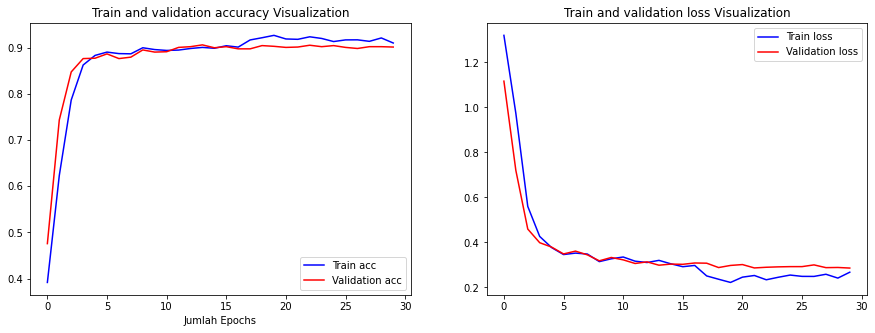

In [ ]:
plot_history(history)

In [ ]:
pred = model.predict(padded_test)

In [ ]:
pred2 = np.argmax(pred, axis=1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(label_test, 
                            pred2,
                            target_names=['Science', 'Sports', 'World', 'Business'], 
                            zero_division=0))

              precision    recall  f1-score   support

     Science       0.88      0.86      0.87      2537
      Sports       0.95      0.97      0.96      2458
       World       0.91      0.88      0.89      2509
    Business       0.85      0.88      0.87      2496

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

